In [232]:
from typing import List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import kurtosis, moment, skew
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterGrid, train_test_split
from sklearn.preprocessing import StandardScaler

sns.set_theme(style="darkgrid")


# 1- Datos

In [233]:
rain = pd.read_csv('precipitaciones.csv')
rain.head(5)

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
0,1989-02-01,0.719033,0.117045,0.028272,0.0,0.724667,9.172945,22.595834,52.268010
1,1998-10-01,0.065216,0.000000,0.011493,0.0,0.008968,2.089674,14.702087,45.142041
2,2001-02-01,2.030026,0.047987,0.002634,0.0,0.032163,10.768351,29.465057,65.571098
3,2008-11-01,0.622784,0.000000,0.015872,0.0,1.734168,25.083557,64.901645,113.093488
4,2009-04-01,0.008065,0.000000,0.009396,0.0,12.080715,56.233424,96.364235,155.622235


In [234]:
bank = pd.read_csv('banco_central.csv')
bank.head(5)

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2013-03-01 00:00:00 UTC,102.796.218,10.546.824,978.554.365,102.297.537,114.994.919,110.729.395,100.064.328,103.163.651,103.405.852,...,865.903.468,102.761.705,98.915.705,NaN,108.387.837,580.480.672,NaN,NaN,NaN,28577.0
1,2013-04-01 00:00:00 UTC,101.664.842,999.272.757,927.333.293,104.485.589,102.199.311,106.098.291,102.600.107,101.937.319,102.766.884,...,867.806.065,968.087.179,914.276.663,NaN,104.545.429,544.815.032,NaN,NaN,NaN,32206.0
2,2013-05-01 00:00:00 UTC,101.642.954,993.959.922,96.133.164,105.445.361,968.789.055,100.462.117,104.083.216,101.953.299,102.322.796,...,878.030.947,978.471.874,966.913.278,NaN,99.468.801,56.891.916,NaN,NaN,NaN,31589.0
3,2013-06-01 00:00:00 UTC,998.310.201,968.367.884,102.400.933,999.212.106,89.190.493,939.504.414,103.857.161,100.222.381,995.139.235,...,913.180.348,966.647.135,981.820.974,NaN,94.969.678,56.594.867,NaN,NaN,NaN,28457.0
4,2013-07-01 00:00:00 UTC,964.696.194,961.051.418,980.029.022,100.882.112,901.785.886,92.776.599,969.309.272,962.069.134,962.804.305,...,909.263.447,100.100.749,990.198.382,NaN,102.128.977,586.329.899,NaN,NaN,NaN,31736.0


# 2- Analisis

## Precipitaciones

In [235]:
rain['date'] = pd.DatetimeIndex(rain['date'])
rain.set_index('date', inplace=True)
rain.sort_index(inplace=True)
rain.head(5)

,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
date,,,,,,,,
1979-01-01,2.641948,0.587062,2.447114,1.608992,3.736215,17.859634,25.212940,45.596447
1979-02-01,1.179804,2.432192,3.997852,4.346310,16.347637,17.680612,18.085072,34.075039
1979-03-01,0.255490,0.020601,0.000000,0.055488,0.545324,14.435698,28.696504,66.232248
1979-04-01,10.173699,11.745779,13.722349,12.989194,21.880607,39.136483,43.617921,73.548127
1979-05-01,1.039098,18.609286,50.187148,104.451550,143.914334,219.729235,279.409718,438.005116


In [236]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 496 entries, 1979-01-01 to 2020-04-01
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Coquimbo                             496 non-null    float64
 1   Valparaiso                           496 non-null    float64
 2   Metropolitana_de_Santiago            496 non-null    float64
 3   Libertador_Gral__Bernardo_O_Higgins  496 non-null    float64
 4   Maule                                496 non-null    float64
 5   Biobio                               496 non-null    float64
 6   La_Araucania                         496 non-null    float64
 7   Los_Rios                             496 non-null    float64
dtypes: float64(8)
memory usage: 34.9 KB


In [237]:
rain.describe()

,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,16.154691,32.450980,49.666682,72.249805,98.662773,128.113406,151.486456,199.451789
std,32.629286,55.434330,74.361099,101.426112,122.766771,130.056094,126.628503,140.073615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.001170,0.005331,0.748127
25%,0.821521,1.538162,5.297546,5.343992,11.897363,29.356684,52.930343,89.805643
50%,4.071036,9.037825,19.087592,25.995969,45.649888,79.558557,110.570990,159.467940
75%,16.137600,38.409213,63.408364,101.875093,142.230716,184.751307,208.316243,274.594590
max,347.133889,441.048604,524.592667,645.515752,759.177712,702.434707,661.211203,717.735673


In [238]:
# duplicados
rain.index.duplicated().sum()

0

<AxesSubplot:>

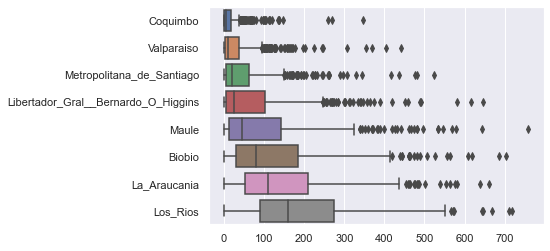

In [239]:
sns.boxplot(data=rain, orient='h')

### Precipitaciones tienen 8 columnas numericas, sin valores faltantes, sin duplicados; los valores tienen sentido real, no parecen haber errores.

## Banco Central

In [240]:
# duplicados
bank['Periodo'].duplicated().sum()

2

### Hay 2 fechas duplicadas (revisando, son la linea completa), por lo que se eliminaran

In [241]:
bank.drop_duplicates(inplace=True)

### pd.DatetimeIndex(banco['Periodo']) 
### entrega el error: 
### "ParserError: month must be in 1..12: 2020-13-01 00:00:00 UTC"

In [242]:
bank['Periodo'].sort_values().tail(5)

92     2020-08-01 00:00:00 UTC
93     2020-09-01 00:00:00 UTC
94     2020-10-01 00:00:00 UTC
145    2020-11-01 00:00:00 UTC
89     2020-13-01 00:00:00 UTC
Name: Periodo, dtype: object

### Esto muestra que deberia ser '2020-12-01 00:00:00 UTC', por lo que se corregira

In [243]:
bank['Periodo'] = bank['Periodo'].replace('2020-13-01 00:00:00 UTC', '2020-12-01 00:00:00 UTC')
bank['Periodo'] = pd.DatetimeIndex(bank['Periodo'])
bank.set_index('Periodo', inplace=True)
bank.index = bank.index.tz_localize(None) # eliminar timezone para evitar problemas
bank.sort_index(inplace=True)
bank.tail(5)

,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
Periodo,,,,,,,,,,,,,,,,,,,,,
2020-08-01,101.314.552,926.876.935,103.697.799,980.026.279,798.286.232,108.232.893,104.806.496,100.569.037,10.092.332,15.867.781,...,10.151.671,990.282.658,10.054.901,105.462.309,960.377.084,6452,119.872.405,107.356.493,172.702.233,19037.0
2020-09-01,103.201.091,922.072.659,100.589.658,100.132.069,793.042.271,111.622.999,108.317.886,102.561.718,103.388.943,169.746.171,...,100.765.123,981.354.575,986.035.178,99.974.429,972.476.933,6163.1,118.690.966,107.622.401,165.411.522,31897.0
2020-10-01,108.402.879,103.551.978,103.153.982,108.477.999,998.283.785,116.649.655,109.798.567,108.112.878,108.891.792,NaN,...,102.554.585,104.873.347,102.057.742,10.233.489,10.824.254,6436.9,122.239.313,114.265.499,155.896.885,36243.0
2020-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29486.0
2020-12-01,NaN,NaN,NaN,NaN,NaN,803.222.345,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,893.234.345,NaN


In [244]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 612 entries, 1970-01-01 to 2020-12-01
Data columns (total 84 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Imacec_empalmado                                                                    298 non-null    object 
 1   Imacec_produccion_de_bienes                                                         298 non-null    object 
 2   Imacec_minero                                                                       298 non-null    object 
 3   Imacec_industria                                                                    299 non-null    object 
 4   Imacec_resto_de_bienes                                                              298 non-null    object 
 5   Imacec_comercio                                                                 

### Luego de revisar los datos en detalle (son muchos para mostrarlos en este notebook) se nota que las columnas de dtype 'object' son columnas donde los datos tienen formato de separacion de miles utilizando puntos, por lo que se corregirá. Cabe destacar que dentro de estas mismas columnas hay datos que no siguen el formato, pero se puede ver que probablemente corresponden a errores de digitacion; ejemplo: un valor comun es "109.249.872" y el valor que aparece es "125.5978"; ya que solucionar dato por dato no es factible en general, se reemplazaran los valores que no sigan el formato por np.nan

### Ademas de esto, hay valores faltantes que aparecen como un string 'a', lo cual se cambiara a NaN primero

In [245]:
# fix 'a'
bank.replace('a', np.nan, inplace=True)

bank_num = bank.select_dtypes('float64')
bank_fix_str = bank.select_dtypes('object')

#fix format
def fix_num_format(x):
    try:
        # hay numeros muy pequeños para 4 caracteres
        # pero que tambien corresponden a errores
        has_format = str(x)[-4] == '.'
    except Exception:
        has_format = False
    if has_format:
        return int(str(x).replace('.', ''))
    else:
        return np.nan

bank_fix_str = bank_fix_str.applymap(fix_num_format, na_action='ignore')

bank_fixed = pd.merge(bank_num, bank_fix_str, left_index=True, right_index=True)
bank_fixed.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 612 entries, 1970-01-01 to 2020-12-01
Data columns (total 84 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Precio_de_la_onza_troy_de_oro_dolaresoz                                             611 non-null    float64
 1   Precio_de_la_onza_troy_de_plata_dolaresoz                                           611 non-null    float64
 2   Precio_del_diesel_centavos_de_dolargalon                                            170 non-null    float64
 3   Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas                251 non-null    float64
 4   Precio_del_petroleo_Brent_dolaresbarril                                             251 non-null    float64
 5   Precio_del_petroleo_WTI_dolaresbarril                                           

### Vemos que ahora los valores tienen el dtype apropiado

In [246]:
print(f'Inicio precipitaciones: {rain.index[0]}\nFinal precipitaciones: {rain.index[-1]}')
print(f'Inicio banco: {bank_fixed.index[0]}\nFinal banco: {bank_fixed.index[-1]}')

Inicio precipitaciones: 1979-01-01 00:00:00
Final precipitaciones: 2020-04-01 00:00:00
Inicio banco: 1970-01-01 00:00:00
Final banco: 2020-12-01 00:00:00


### Vemos que los datos de banco comienzan en 1970 y los de precipitaciones en 1979, por lo que se eliminaran los datos entre 1970 y 1979 de banco, ya que no hay datos completos. De la misma forma, tambien los datos despues de 2020-04

In [247]:
bank_final = bank_fixed['1979-01-01' : '2020-04-01']

Text(0.5, 1.0, 'Data de banco\nConteo de NaNs en cada fila (instante de tiempo)')

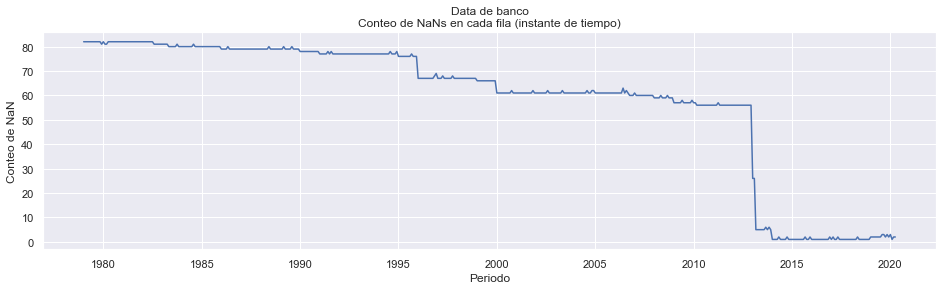

In [248]:
bank_final.isna().sum(axis=1)
_, ax = plt.subplots(figsize=(16, 4))
ax = sns.lineplot(data=bank_final.isna().sum(axis=1), ax=ax)
ax.set_ylabel('Conteo de NaN')
ax.set_title('Data de banco\nConteo de NaNs en cada fila (instante de tiempo)')

### Vemos que en las fechas mas antiguas casi todos los datos son NaN, cerca de 1996, 2000 y 2013 se empezaron a registrar mas datos. En esta ocacion nos enfrentamos a 2 alternativas, utilizar pocas columnas y muchos años de datos (desde 2000 por ejemlpo), o utilizar casi todas las columnas pero solo los ultimos años de datos (desde 2013 por ejemplo). A falta de conocimiento experto sobre la importancia de cada una de estas varibles, se escogerá utilizar datos desde 2013, ya que la cantidad de columnas extra es considerable, y la informacion reciente debe ser de mayor importancia para la prediccion.

In [249]:
bank_final = bank_final['2013-03':]

### Como aun hay NaNs presentes, y algunos de estos son aislados, se reemplazaran estos NaN aislados por el promedio entre el valor anterior y el siguiente

In [250]:
def fill_na_mean(col):
    for idx, value in enumerate(col):
        if np.isnan(value):
            if idx == 0:
                col[idx] = col[idx+1]
            elif idx == len(col)-1:
                col[idx] = col[idx-1]
            else:
                col[idx] = (col[idx-1] + col[idx+1])/2
    return col

bank_final = bank_final.apply(fill_na_mean, axis=0)

Text(0.5, 1.0, 'Conteo de NaN en columnas que los tienen')

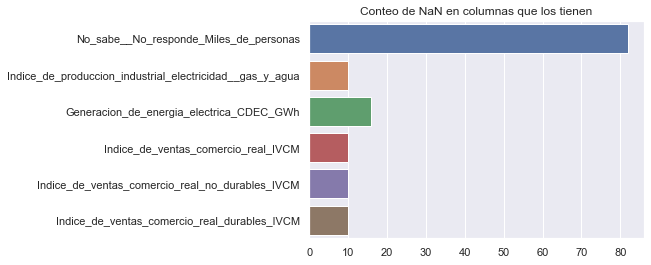

In [251]:
bank_nan = bank_final.loc[:, bank_final.isna().sum(axis=0) > 0]
bank_nan_count = bank_nan.isna().sum(axis=0)
ax = sns.barplot(y=bank_nan_count.index, x=bank_nan_count, orient='h')
ax.set_title('Conteo de NaN en columnas que los tienen')
#test.info()

### Vemos que 5 columnas aun contienen NaN, para la primera es claro que la mayoria de los valores son NaN por lo que se deberia eliminar, pero para las siguientes se podria utilizar algun metodo para rellenar los valores de una forma que respete las tendencias de los datos; debido a que podria tomar algo de tiempo de implementar, en ese caso solo se eliminaran

In [252]:
bank_final = bank_final.drop(bank_nan.columns, axis=1)
print(f'Cantidad de NaN total: {bank_final.isna().sum().sum()}')

Cantidad de NaN total: 0


In [253]:
bank_final.describe()

,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Ventas_autos_nuevos,Imacec_empalmado,Imacec_produccion_de_bienes,...,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial__manufacturera
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,8.600000e+01,8.600000e+01,...,8.600000e+01,8.600000e+01,8.600000e+01,8.600000e+01,8.600000e+01,8.600000e+01,8.600000e+01,8.600000e+01,8.600000e+01,8.600000e+01
mean,1293.388256,167.124988,195.734419,3.063577,68.254884,63.170349,71.880372,28813.093023,2.247657e+08,3.761309e+08,...,4.276736e+08,3.168138e+08,2.249557e+08,3.444258e+08,1.972606e+08,1.397219e+08,7.346277e+08,4.847034e+08,5.677442e+08,3.570961e+08
std,119.438952,42.056224,59.442255,0.806873,23.729746,21.810025,27.063838,5386.783001,3.061803e+08,4.077590e+08,...,1.255462e+08,3.648186e+08,6.889579e+07,9.047636e+07,1.118383e+08,2.337858e+08,3.630661e+08,4.343291e+08,4.291586e+08,4.031664e+08
min,1068.450000,16.634000,79.490000,1.704400,23.340000,16.520000,29.233000,8906.000000,1.057236e+07,1.014872e+06,...,3.614386e+07,1.036809e+07,2.124974e+07,3.661411e+06,1.372203e+07,9.362100e+04,9.091755e+06,1.060978e+07,1.013291e+07,1.002002e+06
25%,1224.075000,153.182000,153.982500,2.635675,50.995000,48.562500,47.616000,24576.750000,1.032325e+08,1.033734e+08,...,4.201140e+08,1.059657e+08,2.212105e+08,3.484738e+08,1.107790e+08,1.069987e+07,8.703623e+08,1.027088e+08,1.017429e+08,1.015425e+08
50%,1280.640000,168.245500,183.980000,2.885750,62.655000,56.810000,66.052000,28699.500000,1.082720e+08,1.088011e+08,...,4.507447e+08,1.134871e+08,2.392678e+08,3.652331e+08,1.880626e+08,1.061027e+08,9.181720e+08,1.053650e+08,9.095230e+08,1.046834e+08
75%,1331.890000,181.162500,226.347500,3.607000,78.755000,70.817500,93.880250,32631.250000,1.141430e+08,9.350305e+08,...,4.963899e+08,6.556609e+08,2.695510e+08,3.777900e+08,2.622501e+08,1.097777e+08,9.424585e+08,9.683455e+08,9.595858e+08,9.441802e+08
max,1686.320000,288.157000,304.160000,5.984200,111.870000,106.550000,142.797000,39263.000000,9.998748e+08,9.992728e+08,...,5.600513e+08,9.856887e+08,2.980387e+08,4.473612e+08,4.967450e+08,9.977333e+08,9.987790e+08,9.996066e+08,9.994139e+08,9.990540e+08


### Para varias columnas de los datos de banco hay valores que son muy distintos a los valores cercanos, posiblemente se trate de errores, y se podrian trabajar para solucionarlos, pero por temas de tiempo, se dejaran ahi

# Visualizacion

In [254]:
def rain_plot(rain_data: pd.DataFrame, region: str, start: str, end: str):
    assert region in rain_data.columns
    assert start in rain_data.index
    assert end in rain_data.index

    fig, ax = plt.subplots(figsize=(16, 4))
    
    graph_data = rain_data[region].loc[start:end]
    ax = sns.lineplot(data=graph_data, ax=ax)
    ax.set_xlabel('Fechas')
    ax.set_title(f'Region: {region}')
    ax.set_ylabel('Precipitaciones [mm]')

    return fig


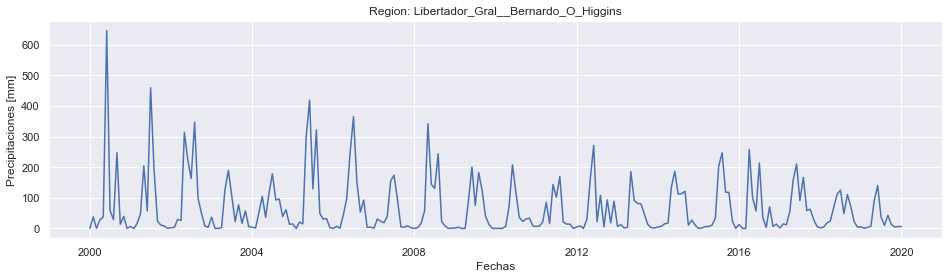

In [255]:
rain_plot(rain, 'Libertador_Gral__Bernardo_O_Higgins', '2000-01-01', '2020-01-01')
plt.show()

### Como es de esperar la mayor cantidad de precipitaciones ocurre a mitad de año (invierno), por lo que se nota un ciclo anual; pero ademas de esto, tambien se nota una disminucion paulatina en el promedio de lluvia anual, que se nota principalmente en los maximos

In [256]:
def rain_plot_yearly(rain_data: pd.DataFrame, region: str, years: List[int]):
    assert region in rain_data.columns
    for year in years:
        assert str(year) in rain_data.index

    months = ['', 'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

    fig, ax = plt.subplots(figsize=(16, 4))
    
    graph_data = pd.DataFrame(rain_data[region])
    graph_data['month'] = pd.to_datetime(graph_data.index).month
    graph_data['year'] = pd.to_datetime(graph_data.index).year
    graph_data = graph_data[graph_data['year'].isin(years)] 
    ax = sns.lineplot(x='month', y=region, hue='year',data=graph_data, ax=ax) 

    ax.set_xlabel('Mes')
    ax.set_xticks(range(13))
    ax.set_xticklabels(months)
    ax.set_title(f'Region: {region}')
    ax.set_ylabel('Precipitaciones [mm]')

    return fig

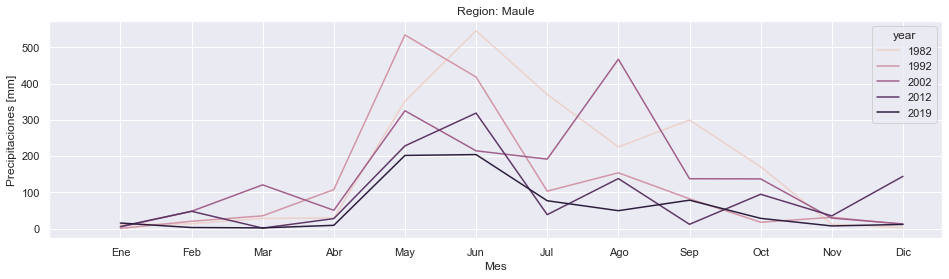

In [257]:
rain_plot_yearly(rain, 'Maule', [1982, 1992, 2002, 2012, 2019])
plt.show()

### En este grafico vemos con mas claridad lo comentado anteriormente, los meses de invierno son mas lluviosos, y a medida que avanzan los años, la cantidad de precipitaciones ha disminuido. Cabe destacar que el mes de Julio suele tener menos precipitaciones que los meses vecinos, lo que es curioso.

In [258]:
def bank_plot(bank_data: pd.DataFrame, col_1: str, col_2: str, start: str, end: str):
    assert col_1 in bank_data.columns
    assert col_2 in bank_data.columns
    assert start in bank_data.index
    assert end in bank_data.index

    fig, ax = plt.subplots(figsize=(16, 4))
    
    graph_data = bank_data[[col_1, col_2]].loc[start:end]
    ax = sns.lineplot(data=graph_data, ax=ax)
    ax.set_xlabel('Fechas')
    ax.set_title(f'Serie 1: {col_1} - Serie 2: {col_2}')
    ax.set_ylabel('Valor')

    return fig

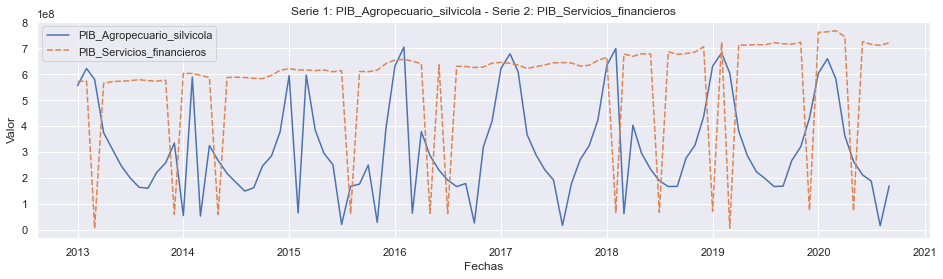

In [259]:
bank_plot(bank_fixed, 'PIB_Agropecuario_silvicola', 'PIB_Servicios_financieros', '2013-01-01', '2020-12-01')
plt.show()

### En cuanto al PIB agropecuario silvicola, se nota que sigue un ciclo anual, con un maximo al fin-inicio de año.
### En cuanto al PIB de Servicios financieros, no parece seguir un ciclo; pero los valores altos son bastante estables con grandes caidas repentinas de un solo mes, lo cual posiblemente significa que las caidas corresponden a errores en los datos (tambien se notan algunas en el otro PIB); como no tengo conocimientos en qué es esperable para este valor, personalmente le preguntaria a una persona experta.

### Ambas series parecen tener un aumento del promedio a medida que pasan los años, fuera de eso, no parecen tener relacion.

# 4- Tratamiento y creacion de variables

### Para evaluar la correlacion entre series temporales existen tecnicas especiales, ya que debido al posible desfase temporal entre las series calcularla punto por punto puede resultar en una correlacion errada; una tecnica apropiada para este caso podria ser 'time-lagged cross correlation' que considera y encuentra el desfase, funciona especialmente bien cuando existen ciclos constantes, aunque podria requerir quitarle la tendencia a las series (por ejemplo, el aumento contante con los años) para quedarse con los ciclos estacionarios y que funcione de mejor manera.
### Si la correlacion entre 2 features es muy alta (cercana a 1 o -1) esto indica que la informacion que estas contienen es muy similar (se relacionan linearmente), por lo que no es ideal mantener ambas, son redundantes; idealmente se quiere que las variables sean independientes, por lo que mostraran una correlacion baja; pero es importante destacar que una correlacion baja no garantiza que las variables no sean dependientes, ya que podrian estar relacionadas de manera no lineal

In [260]:
milk = pd.read_csv('precio_leche.csv')

In [261]:
month_map = {
    'Ene':1,
    'Feb':2,
    'Mar':3,
    'Abr':4,
    'May':5,
    'Jun':6,
    'Jul':7,
    'Ago':8,
    'Sep':9,
    'Oct':10,
    'Nov':11,
    'Dic':12}
milk['Mes'] = milk['Mes'].apply(lambda x: month_map[x])
milk['Trimestre'] = milk['Mes'].apply(lambda x: int((x-1)/4) + 1)
milk.set_index(pd.DatetimeIndex(milk['Anio'].apply(str) + ' - ' + milk['Mes'].apply(str)), inplace=True)

### Debido a la falta de conocimiento experto sobre las variables de banco (y para no tomar el tiempo de analizar una por una), simplemente se utilizaran todos las disponibles despues de la limpieza

In [262]:
rain_bank = pd.merge(rain, bank_final, left_index=True, right_index=True)
full_data = pd.merge(rain_bank, milk, left_index=True, right_index=True)

### A continuacion se transformarán los datos para ser utilizados por el modelo, y esto se hará con los siguientes pasos:
### - Separar en ventanas de tiempo: El modelo a utilizar tiene una cantidad fija de datos de entrada, por lo que se usarán ventanas de tiempo para tener informacion de cada columna en el tiempo
### - Calcular estadisticas: Para cada ventana se calcula una serie de estadisticas por columna, luego de esto se utiliza flatten para transformar los resultados en un vector de caracteristicas
### - Estandarizar y pca: Se estandarizan los resultados y se utiliza PCA para reducir la cantidad de caracteristicas, ya que son muchas, y podria perjudicar los resultados del modelo  

In [263]:
def split_windows(df: pd.DataFrame, window_size: int, stride: int) -> np.ndarray:
    """Splits a dataframe into time windows

    Args:
        df (pd.DataFrame): Dataframe to transform
        window_size (int): Size of time window
        stride (int): Number of stride size

    Returns:
        ndarray: Numpy array of size (-1, window_size, 'num_cols_in_df'), 
                    with the time windows
    """
    array = df.values
    num_windows = int(np.ceil((array.shape[0] - window_size + 1) / stride))

    window_array = np.empty((num_windows, window_size, array.shape[1]))

    # iterate per window to save
    for i in range(0, num_windows):
        step = i*stride
        window_array[i] = array[step:step + window_size, :]

    return window_array

def time_features(x: np.ndarray) -> np.ndarray:
    """Calculates time features per column in matrix 'x'

    Args:
        x (np.ndarray): Numpy array of 2 dimentions (time window)

    Returns:
        np.ndarray: Numpy array of size (9, 'num_cols_in_x')
    """
    rms = np.sqrt(np.nanmean(np.square(x), axis=0))  #RMS
    peak = np.amax(x, axis=0)  #Peak
    peak_2_peak = np.amax(x, axis=0) - np.amin(x, axis=0)  #peak-peak
    crest = peak / rms  #crest
    mean = np.nanmean(x, axis=0)  #media aritmetica
    var = np.nanvar(x, axis=0)  #varianza
    asimetry = skew(x, axis=0)  #asimetria
    kurt = kurtosis(x, axis=0)  #kurtosis, 4to momento
    moment_5 = moment(x, 5, axis=0)  #5to momento

    return np.array(
        (rms, peak, peak_2_peak, crest, mean, var, asimetry, kurt, moment_5))

def get_x_y(df: pd.DataFrame, y_col: str, window_size: int, stride: int) -> Tuple[np.ndarray, np.ndarray]:
    """Processes the input Dataframe to transform it into
    usable X (data) and y (future prediction) for training

    Args:
        df (pd.DataFrame): Dataframe to transform
        y_col (str): Name of column with value to predict
        window_size (int): Size of time window
        stride (int): Number of stride size

    Returns:
        Tuple[np.ndarray, np.ndarray]: 'X' and 'y' numpy arrays
    """

    windows_array = split_windows(df, window_size, stride)

    #Calculate features
    n_wind, _, n_col = windows_array.shape
    x_array = np.empty((n_wind, 9 * n_col))

    for win_index in range(n_wind):
        x_array[win_index, :] = time_features(windows_array[win_index, :, :]).flatten()

    
    x_array = x_array[:-1] # ignore last one
    # (last window takes the last time values, so it doesn't have a next value to predict)
   
    y_series = df[y_col][window_size:]
    y_array = y_series.values

    assert x_array.shape[0] == y_array.shape[0]
    return x_array, y_array


### Se utilizara 4 meses de datos (window_size=4) para cada prediccion porque 1 trimestre deberia ser suficiente para que el algoritmo distinga en que parte del ciclo anual está. Y stride=1 para aprovechar al maximo la poca data temporal


In [264]:
x_raw, y_raw = get_x_y(full_data, window_size=4, stride=1, y_col = 'Precio_leche')

# Modelo

### Se crearan sets de test y validacion correspondientes a aproximadamente los 2 ultimos años, siendo 'test' el ultimo, y 'val' el penultimo, porque la metrica que describe de mejor manera la capacidad predictiva real debe ser calculada en la data mas reciente
### No se utilizará cross-validation ya que tomar distintas secciones de tiempo desconectadas y testear en una de ellas a la vez, produciria una metrica no realista; por ejemplo al entrenar con 2010-2011-2013 y testear en 2012, lo cual no es una prediccion futura propiamente tal   

In [265]:
x_train, x_test, y_train, y_test = train_test_split(x_raw, y_raw, test_size=0.35, shuffle=False)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, shuffle=False)

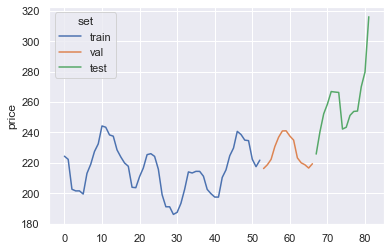

In [266]:
df_1 = pd.DataFrame({'price':y_train, 'set':np.repeat('train', y_train.shape[0])})
df_2 = pd.DataFrame({'price':y_val, 'set':np.repeat('val', y_val.shape[0])})
df_3 = pd.DataFrame({'price':y_test, 'set':np.repeat('test', y_test.shape[0])})
df_real = pd.concat([df_1, df_2, df_3]).reset_index(drop=True)

ax = sns.lineplot(y='price', x=df_f.index, data=df_f, hue='set')


### Como fue mencionado antes, se estandarizaran los datos y reduciran con PCA

In [267]:
def transform_data(x_data, scaler, pca, mode):
    #Standar scaler
    if mode == 'train':
        x_data = scaler.fit_transform(x_data)
        x_data = pca.fit_transform(x_data)

    elif mode == 'test':
        x_data = scaler.transform(x_data)
        x_data = pca.transform(x_data)    
    return x_data

### Vemos cuantos features son necesarios para mantener la mayoria de la varianza

<AxesSubplot:>

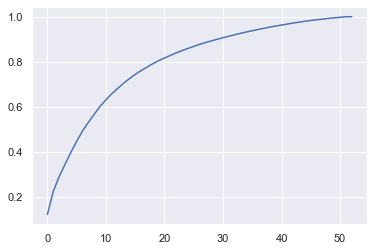

In [268]:
# reduce dimentionality
scaler = StandardScaler()
pca = PCA()

_ = transform_data(x_train, scaler, pca, 'train')

var_acum = pca.explained_variance_ratio_.cumsum()
sns.lineplot(data=var_acum)


### Escogemos 40 componentes, aproximadamente 96% var explicada

In [269]:
print(f'varianza explicada {var_acum[40-1]}')

varianza explicada 0.9586429673816725


In [270]:
scaler = StandardScaler()
pca = PCA(n_components=40)

x_train_final = transform_data(x_train, scaler, pca, 'train')
x_val_final = transform_data(x_val, scaler, pca, 'test')
x_test_final = transform_data(x_test, scaler, pca, 'test')

### Se utilizará un modelo GradientBoostingRegressor, y se utilizará un grid para encontrar los mejores parametros segun la metrica MSE en el set de validacion

In [271]:
search_params = {
    'loss':['ls', 'lad', 'huber'],
    'max_depth':[x for x in range(1,7)],
    'subsample':[0.1*x+0.5 for x in range(1,6)],
}

model_class = GradientBoostingRegressor
minimize_metric = mean_squared_error 
best_score = 10**6

param_grid = ParameterGrid(search_params)
best_params = None
for params in param_grid:
    model = model_class(**params)
    model.fit(x_train_final, y_train)
    pred = model.predict(x_val_final)
    score = minimize_metric(y_val, pred)
    if score < best_score:
        best_score = score
        best_params = params

print(f'best score: {best_score}\nbest params:{best_params}')

model = model_class(**best_params)
model.fit(x_train_final, y_train)

best score: 77.56855361311644
best params:{'loss': 'ls', 'max_depth': 3, 'subsample': 0.6}


GradientBoostingRegressor(subsample=0.6)

### Se utiliza el modelo entrenado para predecir

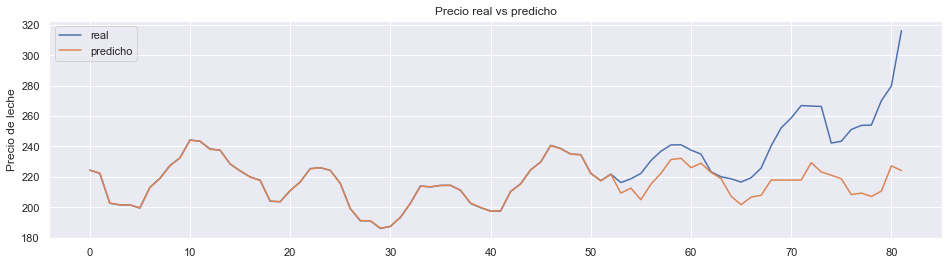

In [272]:
x_full = np.concatenate([x_train_final, x_val_final, x_test_final])
y_full = np.concatenate([y_train, y_val, y_test])

pred = model.predict(x_full)


_, ax = plt.subplots(figsize=(16, 4))
ax.plot(y_full)
ax.plot(pred)
ax.set_ylabel('Precio de leche')
ax.set_title('Precio real vs predicho')
ax.legend(['real', 'predicho'])
plt.show()



### Vemos que el modelo logra modelar la forma ciclica del precio, pero no logra seguir la tendencia al aumento
### Podemos decir que este modelo no es util, ya que probablemente se equivocará aun mas en el futuro, al no seguir la tendencia; esto posiblemente se deba al tipo de modelo, ya que al estar basado en arboles de decision, aprende mapear valores de entrada a casillar con valores de salida, no aprende una funcion que pueda seguir creciendo infinitamente, por lo que un modelo lineal podria ser una mejor idea, o algun modelo especializado para forecasting.
### Tiene sentido mirar metricas de regresion como diferencia entre la curva real y la predicha (MSE, MAE, otras), tambien se podria ver la correlacion entre estas, para verificar si hay un lag entre ellas.
### Para la prediccion del precio de leche podria ser util cualquier dato que influya mas directamente en la oferta y demanda de esta, como litros de leche producidos al mes, precio de alimento para vacas, precio de combustible (transporte), etc.
### Finalmente un modelo de machine learning para forecasting puede ser util en muchas industrias, especialmente en Chile, donde este tipo de pronosticos suele hacerse utilizando modelos muy basicos; poder predecir certeramente algo a futuro permite movilizar solo los recursos necesarios para lograr un objetivo, aumentando la eficiencia y la eficacia; para industrias especialmente contaminantes esta mejor eficiencia puede impactar en las emisiones, una mayor prediccion en desplazamiento vehicular podria disminuir las esperas (en donde se consume algo de combustible), o una mejor prediccion de ventas podria disminuir toneladas de productos desperdiciados; tambien el predecir certeramente el avance del calentamiento global podria resultar en mejores tomas de decisiones en como enfrentarlo.